In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import yfinance as yf

In [11]:
df = yf.download(tickers = "MSFT", period = "10y")
df.to_csv("MSFT.csv")

[*********************100%***********************]  1 of 1 completed


In [12]:
df = pd.read_csv("MSFT.csv")
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-09,40.521728515625,47.189998626708984,47.81999969482422,46.900001525878906,47.61000061035156,23944200
3,2015-01-12,40.01508331298828,46.599998474121094,47.540000915527344,46.36000061035156,47.41999816894531,23651900
4,2015-01-13,39.80900955200195,46.36000061035156,47.90999984741211,46.060001373291016,46.970001220703125,35270600


In [13]:
df = df[2:]
df.reset_index()

,index,Price,Adj Close,Close,High,Low,Open,Volume
0,2,2015-01-09,40.521728515625,47.189998626708984,47.81999969482422,46.900001525878906,47.61000061035156,23944200
1,3,2015-01-12,40.01508331298828,46.599998474121094,47.540000915527344,46.36000061035156,47.41999816894531,23651900
2,4,2015-01-13,39.80900955200195,46.36000061035156,47.90999984741211,46.060001373291016,46.970001220703125,35270600
3,5,2015-01-14,39.465538024902344,45.959999084472656,46.2400016784668,45.619998931884766,45.959999084472656,29719600
4,6,2015-01-15,39.05336380004883,45.47999954223633,46.380001068115234,45.40999984741211,46.220001220703125,32750800
...,...,...,...,...,...,...,...,...
2511,2513,2025-01-02,418.5799865722656,418.5799865722656,426.07000732421875,414.8500061035156,425.5299987792969,16896500
2512,2514,2025-01-03,423.3500061035156,423.3500061035156,424.0299987792969,419.5400085449219,421.0799865722656,16662900
2513,2515,2025-01-06,427.8500061035156,427.8500061035156,434.32000732421875,425.4800109863281,428.0,20573600
2514,2516,2025-01-07,422.3699951171875,422.3699951171875,430.6499938964844,420.79998779296875,429.0,18139100


In [14]:
df = df[['Price','Close']]
df

,Price,Close
2,2015-01-09,47.189998626708984
3,2015-01-12,46.599998474121094
4,2015-01-13,46.36000061035156
5,2015-01-14,45.959999084472656
6,2015-01-15,45.47999954223633
...,...,...
2513,2025-01-02,418.5799865722656
2514,2025-01-03,423.3500061035156
2515,2025-01-06,427.8500061035156
2516,2025-01-07,422.3699951171875


In [15]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [16]:
df["Price"] = df["Price"].apply(str_to_datetime)
df

,Price,Close
2,2015-01-09,47.189998626708984
3,2015-01-12,46.599998474121094
4,2015-01-13,46.36000061035156
5,2015-01-14,45.959999084472656
6,2015-01-15,45.47999954223633
...,...,...
2513,2025-01-02,418.5799865722656
2514,2025-01-03,423.3500061035156
2515,2025-01-06,427.8500061035156
2516,2025-01-07,422.3699951171875


In [17]:
df.index = df.pop('Price')
df

,Close
Price,
2015-01-09,47.189998626708984
2015-01-12,46.599998474121094
2015-01-13,46.36000061035156
2015-01-14,45.959999084472656
2015-01-15,45.47999954223633
...,...
2025-01-02,418.5799865722656
2025-01-03,423.3500061035156
2025-01-06,427.8500061035156


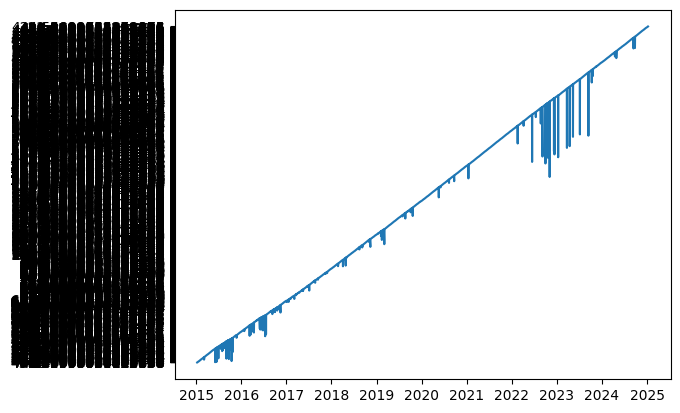

In [18]:
plt.plot(df.index, df["Close"])

In [19]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.99000549316406,237.5800018310547,235.4600067138672,232.33999633789062
1,2021-03-26,237.5800018310547,235.4600067138672,232.33999633789062,236.47999572753906
2,2021-03-29,235.4600067138672,232.33999633789062,236.47999572753906,235.24000549316406
3,2021-03-30,232.33999633789062,236.47999572753906,235.24000549316406,231.85000610351562
4,2021-03-31,236.47999572753906,235.24000549316406,231.85000610351562,235.77000427246094
...,...,...,...,...,...
247,2022-03-17,276.44000244140625,287.1499938964844,294.3900146484375,295.2200012207031
248,2022-03-18,287.1499938964844,294.3900146484375,295.2200012207031,300.42999267578125
249,2022-03-21,294.3900146484375,295.2200012207031,300.42999267578125,299.1600036621094
250,2022-03-22,295.2200012207031,300.42999267578125,299.1600036621094,304.05999755859375


In [20]:
def windowed_df_to_date_X_Y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_Y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

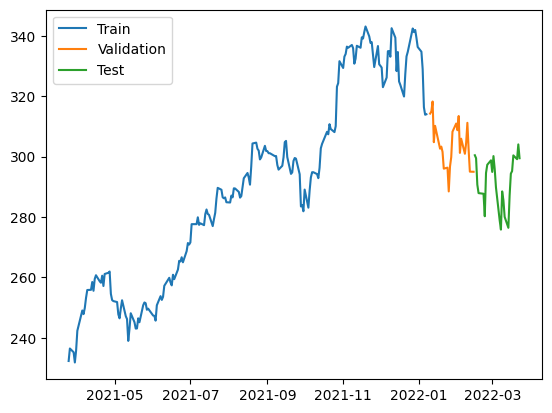

In [21]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 83817.8516 - mean_absolute_error: 287.9481 - val_loss: 92410.1484 - val_mean_absolute_error: 303.9032
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84619.6328 - mean_absolute_error: 289.1474 - val_loss: 92189.1406 - val_mean_absolute_error: 303.5394
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83627.5859 - mean_absolute_error: 287.4456 - val_loss: 91927.6016 - val_mean_absolute_error: 303.1083
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 85762.8125 - mean_absolute_error: 291.1667 - val_loss: 91579.9297 - val_mean_absolute_error: 302.5342
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82205.3438 - mean_absolute_error: 285.0857 - val_loss: 91139.3203 - val_mean_absolute_error: 301.8052
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 81659.8750 - mean_absolute_error: 283.9297 - val_loss: 90631.9766 - val_mean_absolute_error: 300.9635
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


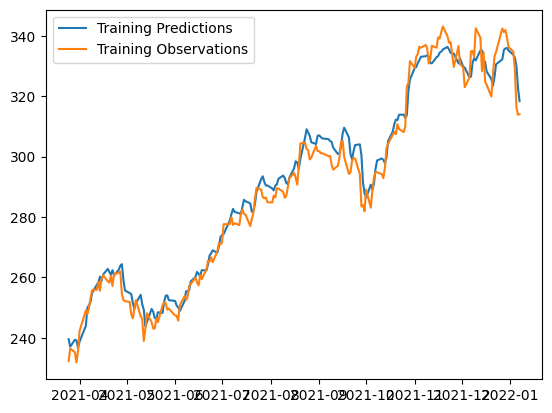

In [23]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


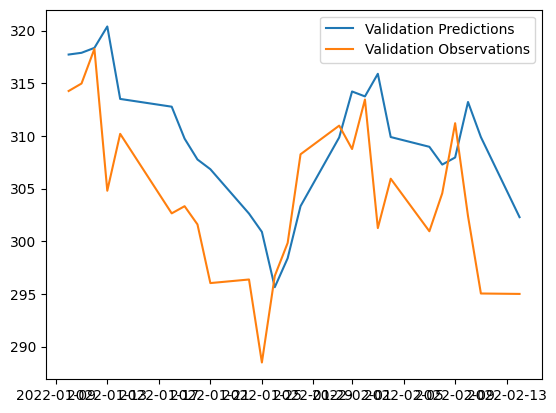

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


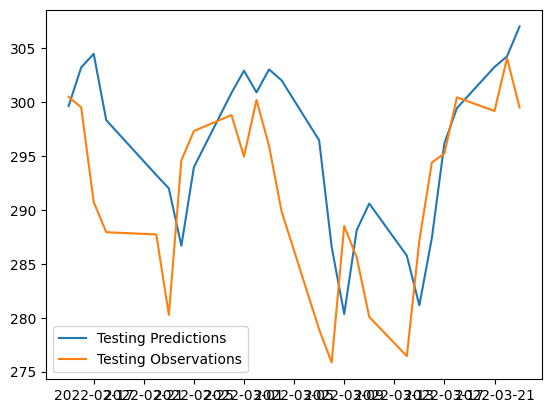

In [25]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

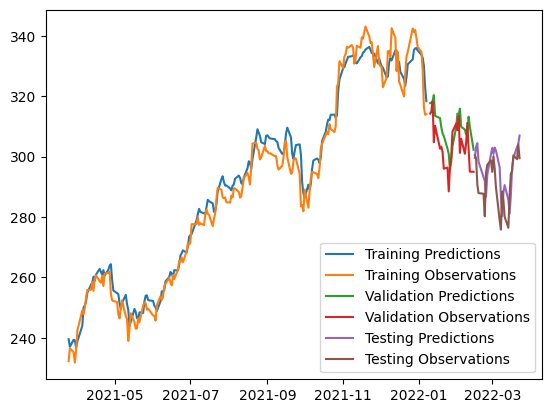

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [27]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

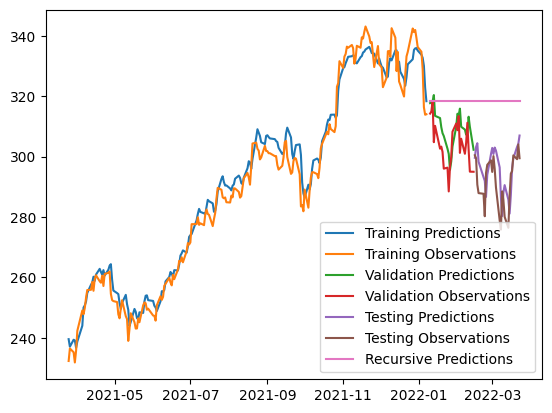

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])